In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.tri import Triangulation
from matplotlib.gridspec import GridSpec

/var/folders/9_/f7vgbb_d1ls8gp1mf0sc2knm0000gn/T/ipykernel_2658/2329178045.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Class Level (Relative Abundance >1%)

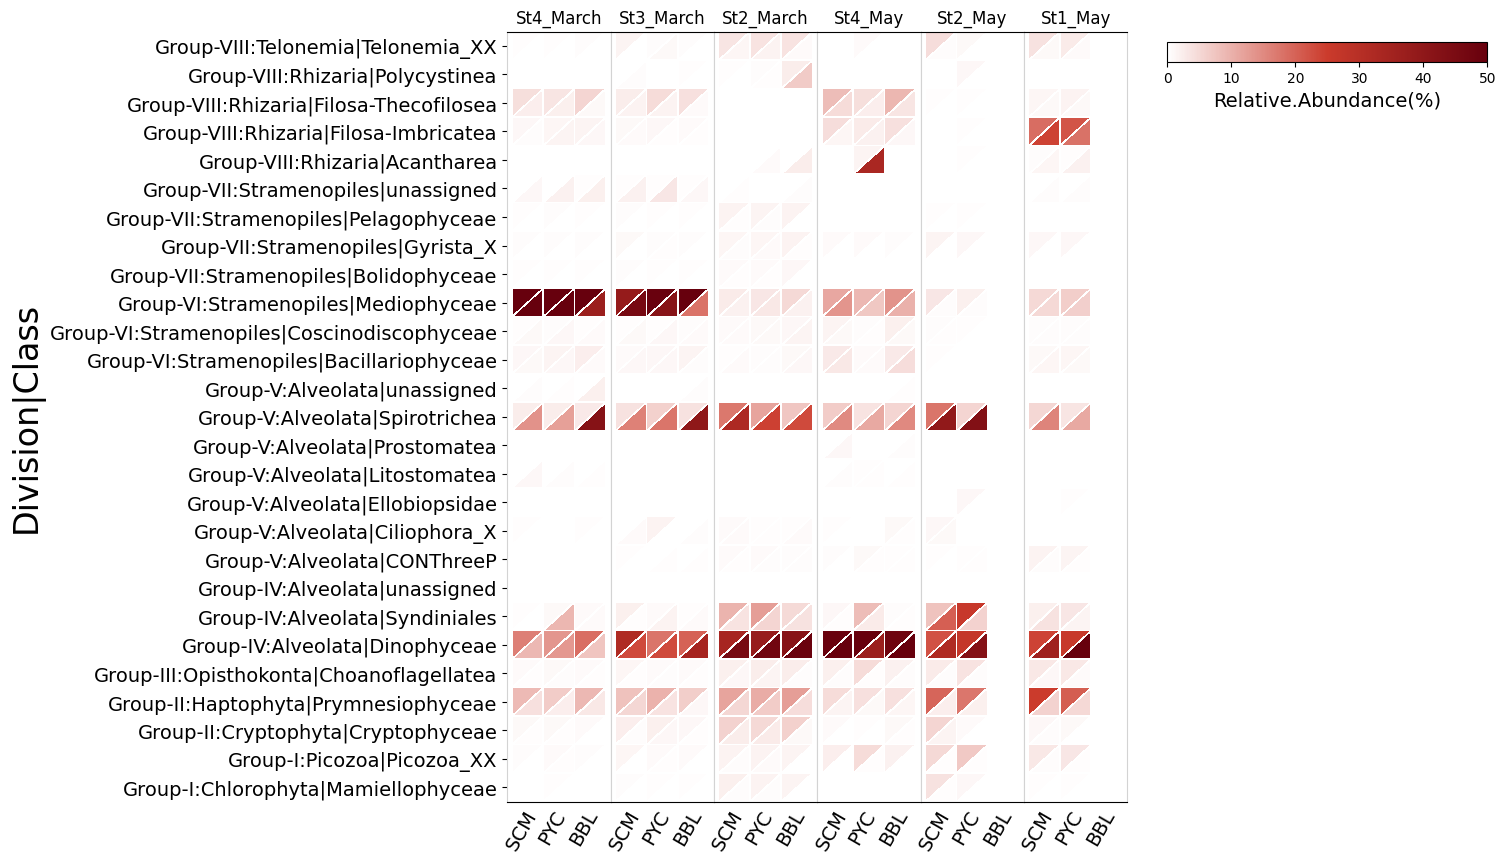

In [4]:

custom_cmap = LinearSegmentedColormap.from_list(
    'custom_cmap',
    [(1, 1, 1),  # low,  
     (203/255, 59/255,44/255), # medium
     (103/255, 0/255, 13/255)],   # high
    N=256
)

# Define the order in which you want the groups to appear
site_order = ['St4_March', 'St3_March', 'St2_March', 'St4_May', 'St2_May','St1_May']
# site_order = ['St4_March', 'St3_March', 'St2_March', 'St4_May', 'St3_May','St1_May']

# Read DataFrame from the CSV file
file_path1 = '/Users/yangqingwei/Library/CloudStorage/OneDrive-KyotoUniversity/Oya18S/02_proce/1_heatmap_class.csv'

df1 = pd.read_csv(file_path1)
df1['sample']=df1['Station'].astype(str) +'_' + df1['Layers']
site_groups = df1.groupby('Station')
unique_species1 = sorted(df1['class'].unique().tolist())
type_mapping = {k: v for v, k in enumerate(df1['Particle_types'].unique())}

# Create a GridSpec layout
gs = GridSpec(1, len(site_order), wspace=0.001)

fig = plt.figure(figsize=(8, 10))

depth_order = ["SCM", "PYC","BBL"]

def plot_group(ax, group_df1, unique_species1, type_mapping):
    global tripcolor_output
    unique_samples = sorted(group_df1['sample'].unique().tolist(), reverse=True)  # Reverse the order here
    M = len(unique_samples)
    N = len(unique_species1)
    T = group_df1['Particle_types'].nunique()
    values = np.zeros((N, M, T))

    for _, row in group_df1.iterrows():
        i = unique_species1.index(row['class'])
        j = unique_samples.index(row['sample'])
        k = type_mapping[row['Particle_types']]
        values[i, j, k] = row['sumClass']/337.62
    
    # Generate the triangulation
    triangul = triangulation_for_triheatmap(M, N)
    flat_values = np.concatenate([values[:, :, 0].ravel(), values[:, :, 1].ravel()])
    
    tripcolor_output = ax.tripcolor(
        Triangulation(np.tile(triangul[0].x, 2), np.tile(triangul[0].y, 2), 
                      np.concatenate([triangul[0].triangles, triangul[1].triangles])), 
        flat_values, cmap=custom_cmap, norm=plt.Normalize(0, 50), ec='white')
    
    ax.set_title(site)
    return tripcolor_output

def triangulation_for_triheatmap(M, N):
    xv, yv = np.meshgrid(np.arange(0, M+1), np.arange(0, N+1))
    x = xv.ravel()
    y = yv.ravel()
    trianglesA = [(i + j * (M + 1), i + 1 + j * (M + 1), i + 1 + (j + 1) * (M + 1))
                  for j in range(N) for i in range(M)]
    trianglesB = [(i + j * (M + 1), i + 1 + (j + 1) * (M + 1), i + (j + 1) * (M + 1))
                  for j in range(N) for i in range(M)]
    return [Triangulation(x, y, triangles) for triangles in [trianglesA, trianglesB]]

# Loop through the ordered sites
for i, site in enumerate(site_order):
    group_df1 = site_groups.get_group(site)
    unique_depths = sorted(group_df1['Layers'].unique().tolist(), key=lambda x: depth_order.index(x) if x in depth_order else len(depth_order))
    
    ax = fig.add_subplot(gs[0, i], sharey=ax if i else None)
    plot_group(ax, group_df1, unique_species1, type_mapping)
    
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('lightgrey')
    ax.spines['right'].set_color('lightgrey')
    
    ax.set_xticks(np.arange(len(unique_depths))+0.3)  # Set x-tick positions
    ax.set_xticklabels(unique_depths, rotation=60,fontsize=14)  # Set x-tick labels to unique depths
    ax.tick_params(axis='x', length=0)
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='y', which='both', left=False)  # This line removes the y-axis ticks

# Add y-labels explicitly for the first subplot
ax = fig.get_axes()[0]
ax.set_yticks(np.arange(len(unique_species1))+0.5)
ax.set_yticklabels(unique_species1,fontsize=14)
ax.set_ylabel('Division|Class',fontsize=24)
ax.invert_yaxis()
ax.set_ylim([0, len(unique_species1)])  # Remove y-axis whitespace
cbar_ax = fig.add_axes([0.95, 0.85, 0.4, 0.02])  # x, y, width, height
cbar =plt.colorbar(tripcolor_output, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Relative.Abundance(%)',fontsize=14)
# cbar_ax.set_label('Relative Abundance (%)')

# Genus Level Diatom (Relative Abundance > 0.1%)

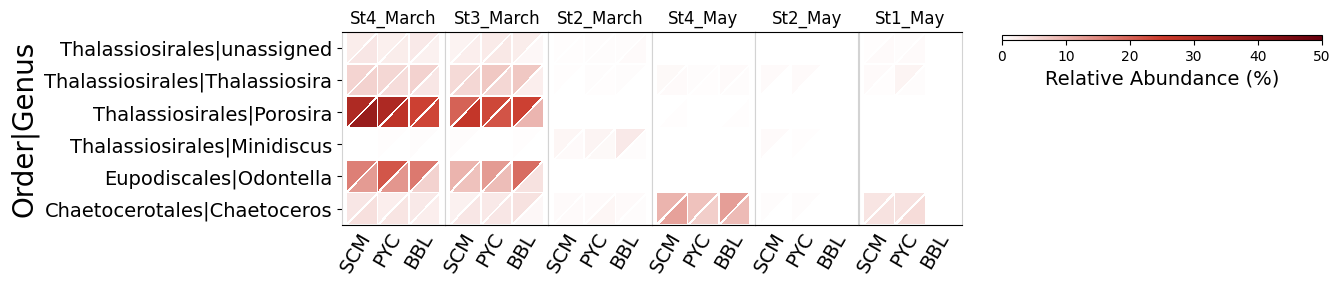

In [5]:
# custom_cmap = LinearSegmentedColormap.from_list(
#     'custom_cmap',
#     [(1, 1, 1),  # low,  
#      (65/255, 182/255,196/255), # medium
#      (37/255, 52/255, 148/255)],   # high
#     N=256
# )

# Define the order in which you want the groups to appear
site_order = ['St4_March', 'St3_March', 'St2_March', 'St4_May', 'St2_May','St1_May']
# site_order = ['St4_March', 'St3_March', 'St2_March', 'St4_May', 'St3_May','St1_May']

# Read DataFrame from the CSV file
file_path1 = '/Users/yangqingwei/Library/CloudStorage/OneDrive-KyotoUniversity/Oya18S/02_proce/2_heatmap_diatom_genus.csv'

df1 = pd.read_csv(file_path1)
df1['sample']=df1['Station'].astype(str) +'_' + df1['Layers']
site_groups = df1.groupby('Station')
unique_species1 = sorted(df1['genus'].unique().tolist())
type_mapping = {k: v for v, k in enumerate(df1['Particle_types'].unique())}

# Create a GridSpec layout
gs = GridSpec(1, len(site_order), wspace=0.001)

fig = plt.figure(figsize=(8, 2.5))

depth_order = ["SCM", "PYC","BBL"]

def plot_group(ax, group_df1, unique_species1, type_mapping):
    global tripcolor_output
    unique_samples = sorted(group_df1['sample'].unique().tolist(), reverse=True)  # Reverse the order here
    M = len(unique_samples)
    N = len(unique_species1)
    T = group_df1['Particle_types'].nunique()
    values = np.zeros((N, M, T))

    for _, row in group_df1.iterrows():
        i = unique_species1.index(row['genus'])
        j = unique_samples.index(row['sample'])
        k = type_mapping[row['Particle_types']]
        values[i, j, k] = row['sumGenus']/337.62
    
    # Generate the triangulation
    triangul = triangulation_for_triheatmap(M, N)
    flat_values = np.concatenate([values[:, :, 0].ravel(), values[:, :, 1].ravel()])
    
    tripcolor_output = ax.tripcolor(
        Triangulation(np.tile(triangul[0].x, 2), np.tile(triangul[0].y, 2), 
                      np.concatenate([triangul[0].triangles, triangul[1].triangles])), 
        flat_values, cmap=custom_cmap, norm=plt.Normalize(0, 50), ec='white')
    
    ax.set_title(site)
    return tripcolor_output

def triangulation_for_triheatmap(M, N):
    xv, yv = np.meshgrid(np.arange(0, M+1), np.arange(0, N+1))
    x = xv.ravel()
    y = yv.ravel()
    trianglesA = [(i + j * (M + 1), i + 1 + j * (M + 1), i + 1 + (j + 1) * (M + 1))
                  for j in range(N) for i in range(M)]
    trianglesB = [(i + j * (M + 1), i + 1 + (j + 1) * (M + 1), i + (j + 1) * (M + 1))
                  for j in range(N) for i in range(M)]
    return [Triangulation(x, y, triangles) for triangles in [trianglesA, trianglesB]]

# Loop through the ordered sites
for i, site in enumerate(site_order):
    group_df1 = site_groups.get_group(site)
    unique_depths = sorted(group_df1['Layers'].unique().tolist(), key=lambda x: depth_order.index(x) if x in depth_order else len(depth_order))
    
    ax = fig.add_subplot(gs[0, i], sharey=ax if i else None)
    plot_group(ax, group_df1, unique_species1, type_mapping)
    
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('lightgrey')
    ax.spines['right'].set_color('lightgrey')
    
    ax.set_xticks(np.arange(len(unique_depths))+0.3)  # Set x-tick positions
    ax.set_xticklabels(unique_depths, rotation=60,fontsize=14)  # Set x-tick labels to unique depths
    ax.tick_params(axis='x', length=0)
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='y', which='both', left=False)  # This line removes the y-axis ticks

# Add y-labels explicitly for the first subplot
ax = fig.get_axes()[0]
ax.set_yticks(np.arange(len(unique_species1))+0.5)
ax.set_yticklabels(unique_species1,fontsize=14)
ax.set_ylabel('Order|Genus',fontsize=20)
ax.invert_yaxis()
ax.set_ylim([0, len(unique_species1)])  # Remove y-axis whitespace
cbar_ax = fig.add_axes([0.95, 0.85, 0.4, 0.02])  # x, y, width, height
cbar =plt.colorbar(tripcolor_output, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Relative Abundance (%)',fontsize=14)
# cbar_ax.set_label('Relative Abundance (%)')

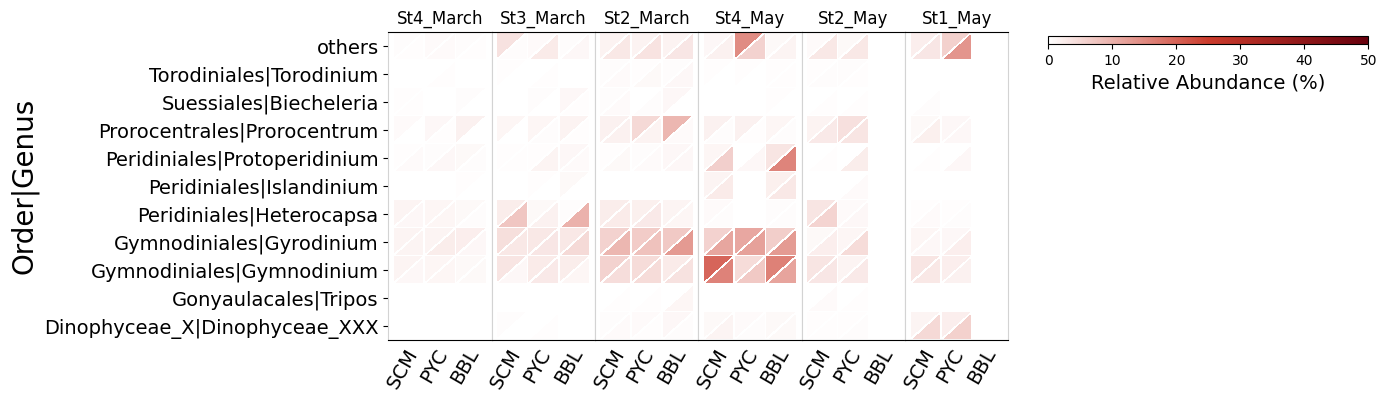

In [7]:
# custom_cmap = LinearSegmentedColormap.from_list(
#     'custom_cmap',
#     [(1, 1, 1),  # low,  
#      (65/255, 182/255,196/255), # medium
#      (37/255, 52/255, 148/255)],   # high
#     N=256
# )

# Define the order in which you want the groups to appear
site_order = ['St4_March', 'St3_March', 'St2_March', 'St4_May', 'St2_May','St1_May']
# site_order = ['St4_March', 'St3_March', 'St2_March', 'St4_May', 'St3_May','St1_May']

# Read DataFrame from the CSV file
file_path1 = '/Users/yangqingwei/Library/CloudStorage/OneDrive-KyotoUniversity/Oya18S/02_proce/2_heatmap_dino_genus.csv'

df1 = pd.read_csv(file_path1)
df1['sample']=df1['Station'].astype(str) +'_' + df1['Layers']
site_groups = df1.groupby('Station')
unique_species1 = sorted(df1['genus'].unique().tolist())
type_mapping = {k: v for v, k in enumerate(df1['Particle_types'].unique())}

# Create a GridSpec layout
gs = GridSpec(1, len(site_order), wspace=0.001)

fig = plt.figure(figsize=(8, 4))

depth_order = ["SCM", "PYC","BBL"]

def plot_group(ax, group_df1, unique_species1, type_mapping):
    global tripcolor_output
    unique_samples = sorted(group_df1['sample'].unique().tolist(), reverse=True)  # Reverse the order here
    M = len(unique_samples)
    N = len(unique_species1)
    T = group_df1['Particle_types'].nunique()
    values = np.zeros((N, M, T))

    for _, row in group_df1.iterrows():
        i = unique_species1.index(row['genus'])
        j = unique_samples.index(row['sample'])
        k = type_mapping[row['Particle_types']]
        values[i, j, k] = row['sumGenus']/337.62
    
    # Generate the triangulation
    triangul = triangulation_for_triheatmap(M, N)
    flat_values = np.concatenate([values[:, :, 0].ravel(), values[:, :, 1].ravel()])
    
    tripcolor_output = ax.tripcolor(
        Triangulation(np.tile(triangul[0].x, 2), np.tile(triangul[0].y, 2), 
                      np.concatenate([triangul[0].triangles, triangul[1].triangles])), 
        flat_values, cmap=custom_cmap, norm=plt.Normalize(0, 50), ec='white')
    
    ax.set_title(site) #, fontsize=12, fontweight='bold'
    return tripcolor_output

def triangulation_for_triheatmap(M, N):
    xv, yv = np.meshgrid(np.arange(0, M+1), np.arange(0, N+1))
    x = xv.ravel()
    y = yv.ravel()
    trianglesA = [(i + j * (M + 1), i + 1 + j * (M + 1), i + 1 + (j + 1) * (M + 1))
                  for j in range(N) for i in range(M)]
    trianglesB = [(i + j * (M + 1), i + 1 + (j + 1) * (M + 1), i + (j + 1) * (M + 1))
                  for j in range(N) for i in range(M)]
    return [Triangulation(x, y, triangles) for triangles in [trianglesA, trianglesB]]

# Loop through the ordered sites
for i, site in enumerate(site_order):
    group_df1 = site_groups.get_group(site)
    unique_depths = sorted(group_df1['Layers'].unique().tolist(), key=lambda x: depth_order.index(x) if x in depth_order else len(depth_order))
    
    ax = fig.add_subplot(gs[0, i], sharey=ax if i else None)
    plot_group(ax, group_df1, unique_species1, type_mapping)
    
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('lightgrey')
    ax.spines['right'].set_color('lightgrey')
    
    ax.set_xticks(np.arange(len(unique_depths))+0.3)  # Set x-tick positions
    ax.set_xticklabels(unique_depths, rotation=60,fontsize=14)  # Set x-tick labels to unique depths
    ax.tick_params(axis='x', length=0)
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='y', which='both', left=False)  # This line removes the y-axis ticks

# Add y-labels explicitly for the first subplot
ax = fig.get_axes()[0]
ax.set_yticks(np.arange(len(unique_species1))+0.5)
ax.set_yticklabels(unique_species1,fontsize=14)
ax.set_ylabel('Order|Genus',fontsize=20)
ax.invert_yaxis()
ax.set_ylim([0, len(unique_species1)])  # Remove y-axis whitespace
cbar_ax = fig.add_axes([0.95, 0.85, 0.4, 0.02])  # x, y, width, height
cbar =plt.colorbar(tripcolor_output, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Relative Abundance (%)',fontsize=14)
# cbar_ax.set_label('Relative Abundance (%)')